In [1]:
# This code contains the kinematic calculations to move a hexapod milling or additive machine.
# equations from: https://www.janssenprecisionengineering.com/page/hexapod-kinematics/

import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
import math
from math import cos, sin, radians

In [2]:
# Machine Parameters

r_base = 150 # radius of circle that hinges on the base are located on, mm
r_plat = 30 # radius of the circle that hinges on the platform are located on, mm
hinge_offset_angle = radians(15) # angle between the two hinges in a hinge pair, input: deg, stored: radians

In [3]:
# Platform Position

B_P_Porg = np.array([40, -4, 30, 1]) # View of 1?  
# B_P_Porg.shape = (4,1)

In [4]:
# Define Functions

def det_local_hinge_coords(r, angle_offset):
    # Creating Hinge locations from offset angles and offset angle from respective hinge
    # This essentially returns local coordinate system?
    hinge_angles = [0, radians(120), radians(240)] # The platform actuators divide the circle by 3 in pairs of 2.
    hinge_coords = []
    
    for angle in hinge_angles:
        hinge_coords.append(np.array([r*cos(angle-angle_offset/2), r*sin(angle-angle_offset/2), 0, 1]))
        hinge_coords.append(np.array([r*cos(angle+angle_offset/2), r*sin(angle+angle_offset/2), 0, 1]))
    return hinge_coords

def plot_platform(B_plat_hinge_locs, B_base_hinge_locs):
    """Creating a plot using a function will make the plot non-interactive"""
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.set_zlim(0, 25)
    # Graph the actuators of the hexapod
    for coord_plat, coord_base in zip(B_plat_hinge_locs, B_base_hinge_locs):
        ax.plot(xs = [float(coord_plat[0]), float(coord_base[0])],ys = [float(coord_plat[1]),float(coord_base[1])],
                 zs = [float(coord_plat[2]),float(coord_base[2])],
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)
    
    for pt in np.linspace(0, 2*math.pi):
        ax.plot([r_base * cos(pt)], [r_base * sin(pt)], [0], markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)

def apply_transform(hinge_array, T):
    """Apply the specified matrix to an array of coordinates"""
    transformed_array = []
    for hinge in hinge_array:
        hinge = np.array(hinge)
        hinge.shape = (4,1)
        print(T@hinge)
        transformed_array.append(T@hinge)
    return transformed_array

[[ 0.866  0.     0.5   40.   ]
 [ 0.     1.     0.    -4.   ]
 [-0.5    0.     0.866 30.   ]
 [ 0.     0.     0.     1.   ]]
[[65.7577375 ]
 [-7.91578577]
 [15.12832708]
 [ 1.        ]]
[[65.7577375 ]
 [-0.08421423]
 [15.12832708]
 [ 1.        ]]
[[30.05788443]
 [23.71638598]
 [35.74025149]
 [ 1.        ]]
[[24.18437807]
 [19.80060021]
 [39.13142144]
 [ 1.        ]]
[[ 24.18437807]
 [-27.80060021]
 [ 39.13142144]
 [  1.        ]]
[[ 30.05788443]
 [-31.71638598]
 [ 35.74025149]
 [  1.        ]]


<IPython.core.display.Javascript object>


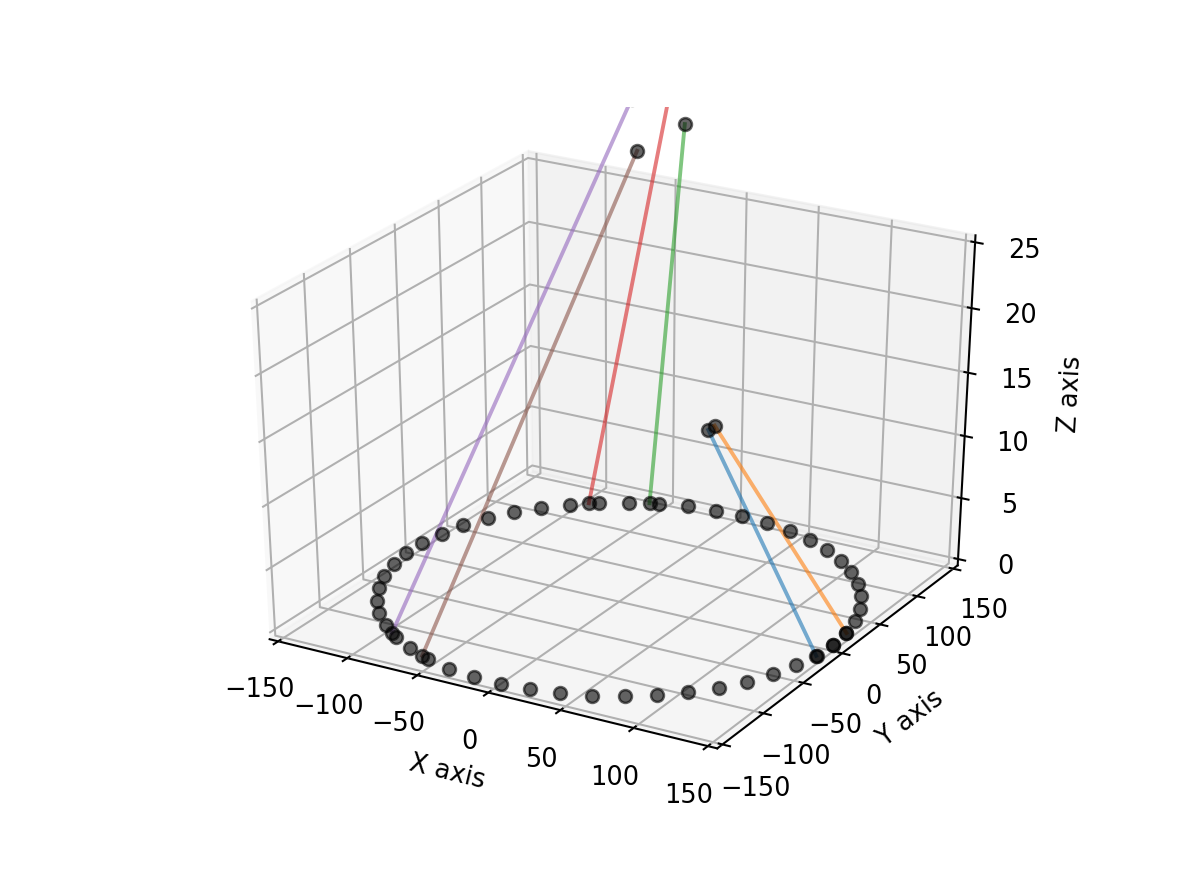

In [91]:
# Main loop

def main(): 
    
    # Determine coordinates for platform and base, in their local coordinate systems, with a view val also. (4 val)
    B_base_hinge_locs = det_local_hinge_coords(r_base, hinge_offset_angle) # B_ means ref. in the base coordinate system
    P_plat_hinge_locs = det_local_hinge_coords(r_plat, hinge_offset_angle) # P_ means ref. in the platform coordinate system
    
    # Building the Transform from the Platform coordinate system to the Base coordinate system
    Col1 = np.array([1.0, 0.0, 0.0, 0.0])
    Col2 = np.array([0.0, 1.0, 0.0, 0.0])
    Col3 = np.array([0.0, 0.0, 1.0, 0.0])
    Col1 = np.array([.866, 0, -.5, 0])
    Col2 = np.array([0, 1, 0, 0])
    Col3 = np.array([.5, 0, .866, 0])
    
    T = np.array([Col1, Col2, Col3, B_P_Porg]).transpose() # Transpose is needed so that the way python reads
    # in the data creates the correct matrix
    print(T)
    
    # Transform the platform hinge locations into the base frame
    B_plat_hinge_locs = apply_transform(P_plat_hinge_locs, T)
    
    # Delete the view from the data for graphing .shape from (4,1) to (3,1)
    B_plat_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_plat_hinge_locs))
    B_base_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_base_hinge_locs))
    
    plot_platform(B_plat_hinge_locs, B_base_hinge_locs)    
    
#     Still testing below code ( and calculations )
#     actuator_locs = []
#     for base_hinge, plat_hinge in zip(B_base_hinge_locs, B_plat_hinge_locs):
#         actuator_locs.append((plat_hinge-base_hinge))
#     print(actuator_locs)
    
#     actuator_len = []
#     for actuator in actuators_maybe:
#         actuator_len.append(LA.norm(actuator))
    
if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>


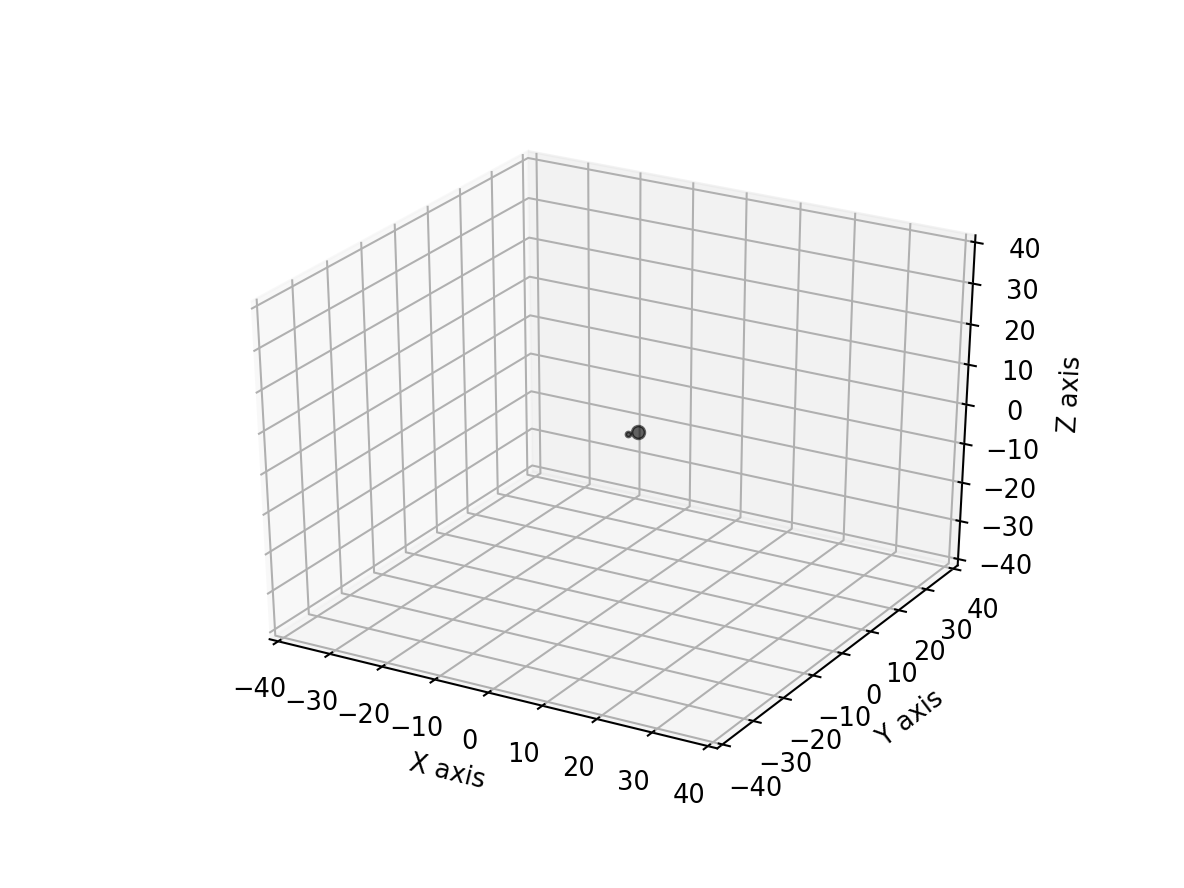

[[ 0.866  0.     0.5    1.   ]
 [ 0.     1.     0.     1.   ]
 [-0.5    0.     0.866  1.   ]
 [ 0.     0.     0.     1.   ]]
[array([[2.366],
       [2.   ],
       [1.366]])]


In [74]:
# Working?


#Testing Transform Calculations
%matplotlib notebook
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_xlim(-40, 40)
ax2.set_ylim(-40, 40)
ax2.set_zlim(-40, 40)

r_circ1 = 25
r_circ1_height = 0
circ1_x = []
circ1_y = []
circ1_z = []
circ1_view = []
circ2_x = []
circ2_y = []
circ2_z = []
circ2_view = []
coord_sys_new_org = np.array([1,1,1,1])

circ2 = []
#Points before Transform:
for pt in np.linspace(0, 2*math.pi):
    circ1_x.append(r_circ1 * cos(pt))
    circ1_y.append(r_circ1 * sin(pt))
    circ1_z.append(r_circ1_height)
    circ1_view.append(1)
    
circ1_x = [1]
circ1_y = [1]
circ1_z = [1]
circ1_view =[1]

# Plot original points     
ax2.plot(circ1_x, circ1_y, circ1_z, markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=2, alpha=0.6)

# Create Rotation Matrix
Col1 = np.array([.866, 0, -.5, 0])
Col2 = np.array([0, 1, 0, 0])
Col3 = np.array([.5, 0, .866, 0])


R = np.array([Col1, Col2, Col3]).transpose()
T = np.array([Col1, Col2, Col3, coord_sys_new_org]).transpose()
print(T)

for pt_x, pt_y, pt_z, pt_view in zip(circ1_x, circ1_y, circ1_z, circ1_view):
    pt_array = np.array([pt_x, pt_y, pt_z, pt_view])
    pt_array.shape = (4,1)
#     print(pt_array)
    circ2.append(T@pt_array)

# print(circ2)

circ2 = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , circ2))
print(circ2)

for point in circ2:
    ax2.plot([float(point[0])], [float(point[1])], [float(point[2])], markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)

<IPython.core.display.Javascript object>


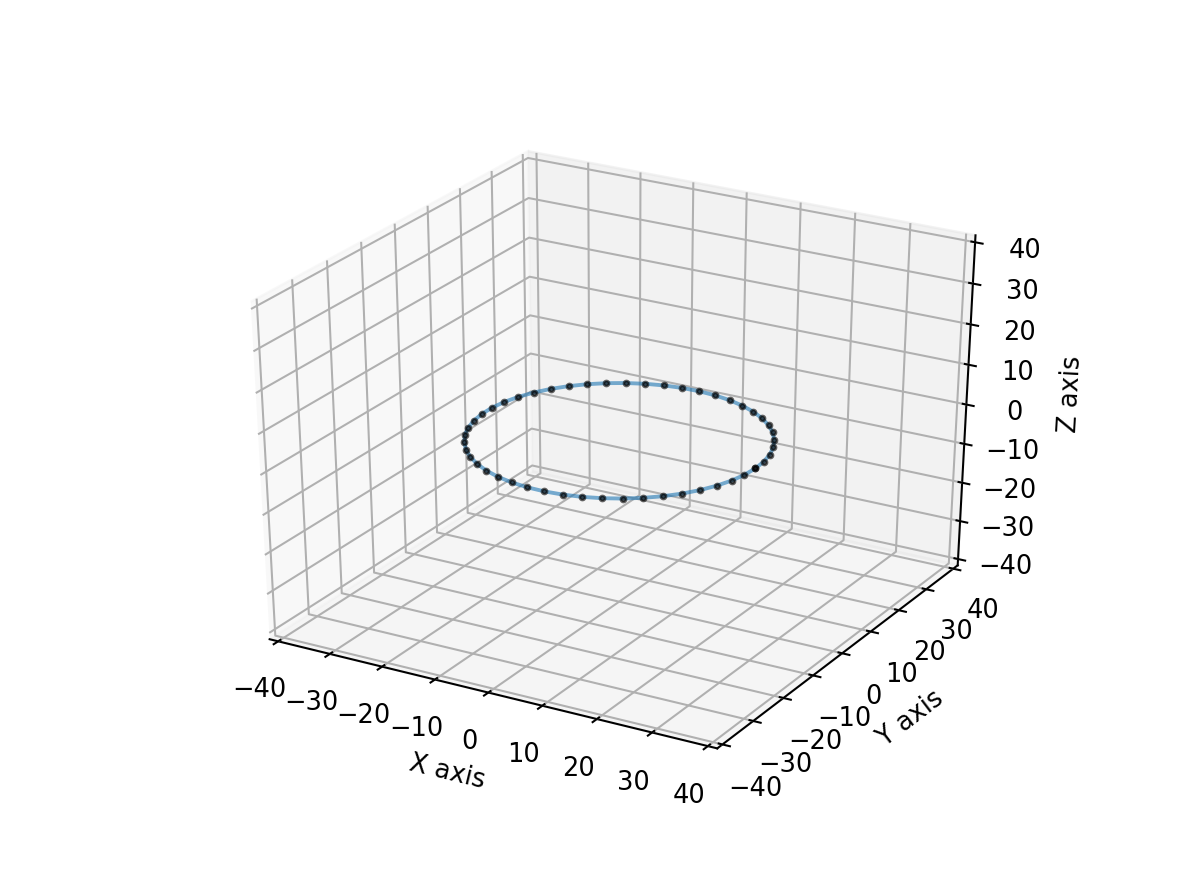

       0    1      2     3
0  0.866  0.0  0.500  10.0
1  0.000  1.0  0.000  20.0
2 -0.500  0.0  0.866  30.0
3  0.000  0.0  0.000   1.0


ValueError: Length of passed values is 3, index implies 4

In [46]:
#Testing Transform Calculations
import pandas as pd

%matplotlib notebook
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_xlim(-40, 40)
ax2.set_ylim(-40, 40)
ax2.set_zlim(-40, 40)

r_circ1 = 25
r_circ1_height = 0
circ1_x = []
circ1_y = []
circ1_z = []
circ1_view = []

r_circ2 = 8
circ2_x = []
circ2_y = []
circ2_z = []
circ2_view = []
circ2 = []

coord_sys_new_org = np.array([10,20,30,1])

#Points before Transform:
for pt in np.linspace(0, 2*math.pi):
    circ1_x.append(r_circ1 * cos(pt))
    circ1_y.append(r_circ1 * sin(pt))
    circ1_z.append(r_circ1_height)
    circ1_view.append(1)

# Plot original points     
ax2.plot(circ1_x, circ1_y, circ1_z, markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=2, alpha=0.6)

# Create Rotation Matrix
Col1 = np.array([.866, 0, -.5, 0])
Col2 = np.array([0, 1, 0, 0])
Col3 = np.array([.5, 0, .866, 0])
R = np.array([Col1, Col2, Col3]).transpose()

# Create Transformation Matrix
T = np.array([Col1, Col2, Col3, coord_sys_new_org]).transpose()
print(pd.DataFrame(T))
T = pd.DataFrame(T)

# Create object to be rotated in base coordinate system
for pt in np.linspace(0, 2*math.pi):
    circ2_x.append(r_circ2 * cos(pt))
    circ2_y.append(r_circ2 * sin(pt))
    circ2_z.append(r_circ1_height)
    circ2_view.append(1)

# Apply the transformation matrix to get to the platform coordinate system    
for x, y, z, view in zip(circ2_x, circ2_y, circ2_z, circ2_view):
    circ2.append(T@np.array([x, y, z, view]))

circ2 = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , circ2))

for point in circ2:
    ax2.plot([float(point[0])], [float(point[1])], [float(point[2])], markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)

In [59]:
R_col1 = np.array([.866, 0, -.5, 0])
R_col2 = np.array([0, 1, 0, 0])
R_col3 = np.array([.5, 0, .866, 0])
P_x = 0
P_y = 0
P_z = 0
x = 1
y = 1
z = 0

def Transform_Point(x, y, z, R_col1, R_col2, R_col3, P_x, P_y, P_z):
    # Create Rotation Matrix
    R = np.array([R_col1, R_col2, R_col3]).transpose()
    # Create Transformation Matrix
    T = np.array([Col1, Col2, Col3, [P_x, P_y, P_z, 1]]).transpose()
    return T@[x, y, z, 1]


    

In [100]:
import pandas as pd
import numpy as np

T = {'x':[.866, 0, -.5, 0], 'y':[0, 1, 0, 0], 'z':[.5, 0, .866, 0], 'view':[1, 1, 1, 1] }
T = pd.DataFrame(T)
data_pt = pd.DataFrame({'x':[1,23,4], 'y':[1,2,3], 'z':[1,2,3], 'view':[1,2,3]})

# Matrix dot product way # 1 (faster than 2?)
new_pt1 = data_pt.apply(lambda point: T@point, axis = 1)

# Matrix dot product way # 2 (loop over dataframe)
new_pt2 = T@ [1,1,1,1]

In [106]:
# Vctorized (?) Matrix dot product way # 3
data_pt_np = data_pt.values
transform = np.array([[.866, 0, -.5, 0], [0, 1, 0, 0], [.5, 0, .866, 0], [1, 1, 1, 1]])
new_pt3 =data_pt_np.dot(transform)
print(new_pt1)
print(new_pt2)
print(new_pt3)
print(data_pt)

        0    1      2    3
0   2.366  2.0  1.366  1.0
1  22.918  4.0 -7.768  2.0
2   7.964  6.0  3.598  3.0
0    2.366
1    2.000
2    1.366
3    1.000
dtype: float64
[[ 2.366  2.     1.366  1.   ]
 [22.918  4.    -7.768  2.   ]
 [ 7.964  6.     3.598  3.   ]]
    x  y  z  view
0   1  1  1     1
1  23  2  2     2
2   4  3  3     3


In [ ]:
https://stackoverflow.com/questions/40031287/matrix-operations-with-rows-of-pandas-dataframes